## Test code to check classifiability of binary classes in Cifar-10 dataset

In [16]:
import torch
from torchvision import datasets, transforms
import numpy as np

# Define a transform to convert the data to tensor and normalize it
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # CIFAR-10 normalization
])

# Load the CIFAR-10 dataset
cifar10 = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

classes = [0,6]
indices = [i for i, (_, label) in enumerate(cifar10) if label in classes]

# DataLoader to handle batching
dataloader = torch.utils.data.DataLoader(cifar10, batch_size=len(cifar10), shuffle=False)
images, labels = next(iter(dataloader))

# Flatten the images for t-SNE
images = images.view(images.shape[0], -1).numpy()
labels = labels.numpy()

# Define the two classes you want to analyze, e.g., 0 for airplane and 2 for bird
selected_classes = [0, 6]  # You can change these values as needed

# Filter indices for the selected classes
indices = np.where((labels == selected_classes[0]) | (labels == selected_classes[1]))[0]

# Filter the images and labels
images = images[indices]
labels = labels[indices]


Files already downloaded and verified


In [17]:
from sklearn.manifold import TSNE
import numpy as np

# Considering the computation cost, you might want to sample the data
indices = np.arange(len(images))
selected_indices = np.random.choice(indices, 3000, replace=False)  # Reduce the dataset size for quicker execution

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=300, random_state=42)  # n_components is the dimension of the embedded space (2D here)
tsne_results = tsne.fit_transform(images[selected_indices])


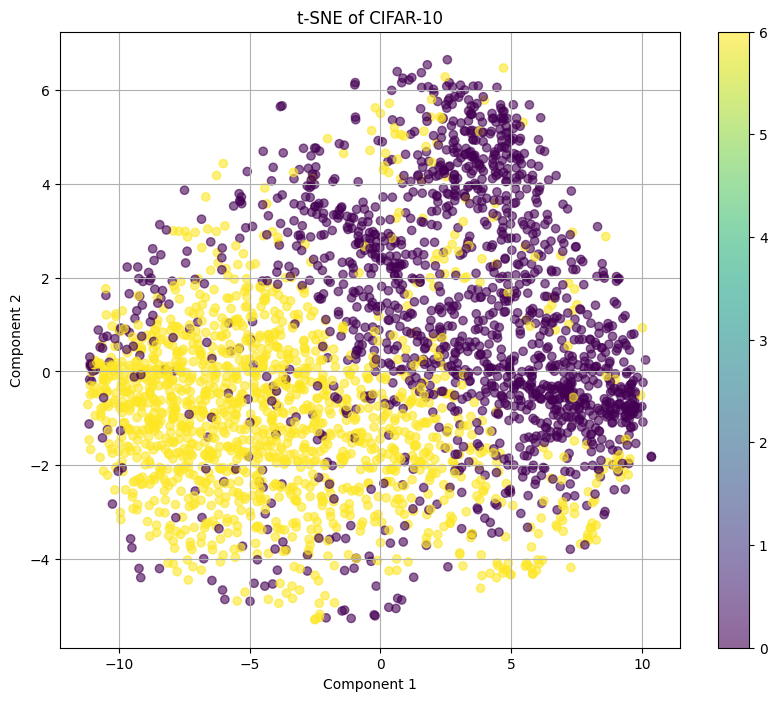

In [19]:
import matplotlib.pyplot as plt

# Create a scatter plot of the t-SNE embeddings
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels[selected_indices], cmap='viridis', alpha=0.6)
plt.colorbar(scatter)
plt.title('t-SNE of CIFAR-10')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()
